## NOTE - I have made an assumption that the clients won't churn for a small change in discount percentage, i.e.

In [35]:
### Importing all the requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/content/IBM - IBM_CAO_data_challenge_DS_2021_.csv')


df.head()

,ORDER_ID,PROD_ID,PROD_CAT,PRICE_ORIG,PRICE_DISC,CLIENT_ID,INDUSTRY,SIZE,STATE
0,DS100049976,77563,SW,6882,3303.36,9228913,IT,20-99,NY
1,DS100049976,19692,SW,4744,2277.12,9228913,IT,20-99,NY
2,DS100049976,51090,SW,7725,3708.00,9228913,IT,20-99,NY
3,DS100049976,94654,SAAS,138,66.24,9228913,IT,20-99,NY
4,DS100049976,77969,SAAS,96,46.08,9228913,IT,20-99,NY


## 1a Across all orders, which pair of product categories appears the most? (For example, SS and HW)


In [37]:
# Method 1 
## getting all the order pairs from the data frame 
from itertools import combinations
cats=df.groupby('ORDER_ID')['PROD_CAT']\
    .agg(list)\
    .apply(lambda x:list(combinations(set(x),2)))\
    .explode()

cats.value_counts()


(SW, HW)      5000
(SW, SAAS)    4735
(SAAS, HW)    3851
(SW, SS)      1420
(HW, SAAS)    1360
(SAAS, SW)     913
(HW, SW)       895
(SAAS, SS)     655
(HW, SS)       533
(SS, HW)        47
(SS, SAAS)      27
(SS, SW)        20
Name: PROD_CAT, dtype: int64

In [38]:
##Method 2
ct = pd.crosstab(df['ORDER_ID'], df['PROD_CAT']).gt(0).astype(int)
co_occur = (ct.T @ ct)


counts = co_occur.where(np.tri(len(co_occur), k=-1, dtype=bool)).stack()

counts.idxmax()

('SW', 'HW')

### (SW,HW) pair appears the most i.e. 5895 times 

## 1 b For the pair identified in 1a, in what percent of orders does it appear?						


In [39]:
## finding the percentage of SW and HW order pair in the orders 
order_Count = df["ORDER_ID"].nunique()

most_occuring = 5895

quotient = most_occuring / order_Count

percent = quotient * 100

percent

57.23300970873786

### (SW,HW) appears 57.23 % times in orders

## 2. How does the frequency of product pairs across orders vary by industry?						


In [40]:
cats=df.groupby(['ORDER_ID','INDUSTRY'])['PROD_CAT']\
.agg(list)\
.apply(lambda x:list(combinations(set(x),2)))\
.explode()

#print(cats)
print(cats.groupby('INDUSTRY').value_counts())

INDUSTRY     PROD_CAT  
FINANCE      (SW, HW)       847
             (SW, SAAS)     762
             (SAAS, HW)     623
             (SW, SS)       427
             (HW, SS)       199
             (SAAS, SS)     195
             (HW, SAAS)     186
             (SAAS, SW)     137
             (HW, SW)       133
             (SS, HW)         6
             (SS, SAAS)       4
             (SS, SW)         2
HEALTH CARE  (SW, HW)       645
             (SW, SAAS)     584
             (SAAS, HW)     482
             (HW, SAAS)     176
             (SW, SS)       174
             (SAAS, SW)     114
             (HW, SW)       112
             (SAAS, SS)      92
             (HW, SS)        76
             (SS, HW)         4
             (SS, SW)         3
             (SS, SAAS)       1
IT           (SW, HW)      2142
             (SW, SAAS)    2093
             (SAAS, HW)    1673
             (HW, SAAS)     610
             (SW, SS)       491
             (SAAS, SW)     388
             (HW

### IT industry has highest frequency, followed by Finance and Real Estate industries. Healthcare and retail have lowest frequency of order pairs. 


## 3. What are the most significant drivers for discount?




In [41]:
df['Discount_Percentage'] = ((df['PRICE_ORIG'] - df['PRICE_DISC'])/ df['PRICE_ORIG']) * 100


In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# label_encoder object knows how to understand word labels.
## converting the Categorical column into numerical columns
 
df['PROD_CAT']=le.fit_transform(df['PROD_CAT'])
df['INDUSTRY']=le.fit_transform(df['INDUSTRY'])
df['SIZE']=le.fit_transform(df['SIZE'])
df['STATE']=le.fit_transform(df['STATE'])
df['ORDER_ID']=le.fit_transform(df['ORDER_ID'])


In [43]:
df['ORDER_ID'].value_counts()

6978    26
9687    24
5052    23
2686    22
541     22
        ..
5604     1
2417     1
7501     1
9917     1
8887     1
Name: ORDER_ID, Length: 10300, dtype: int64

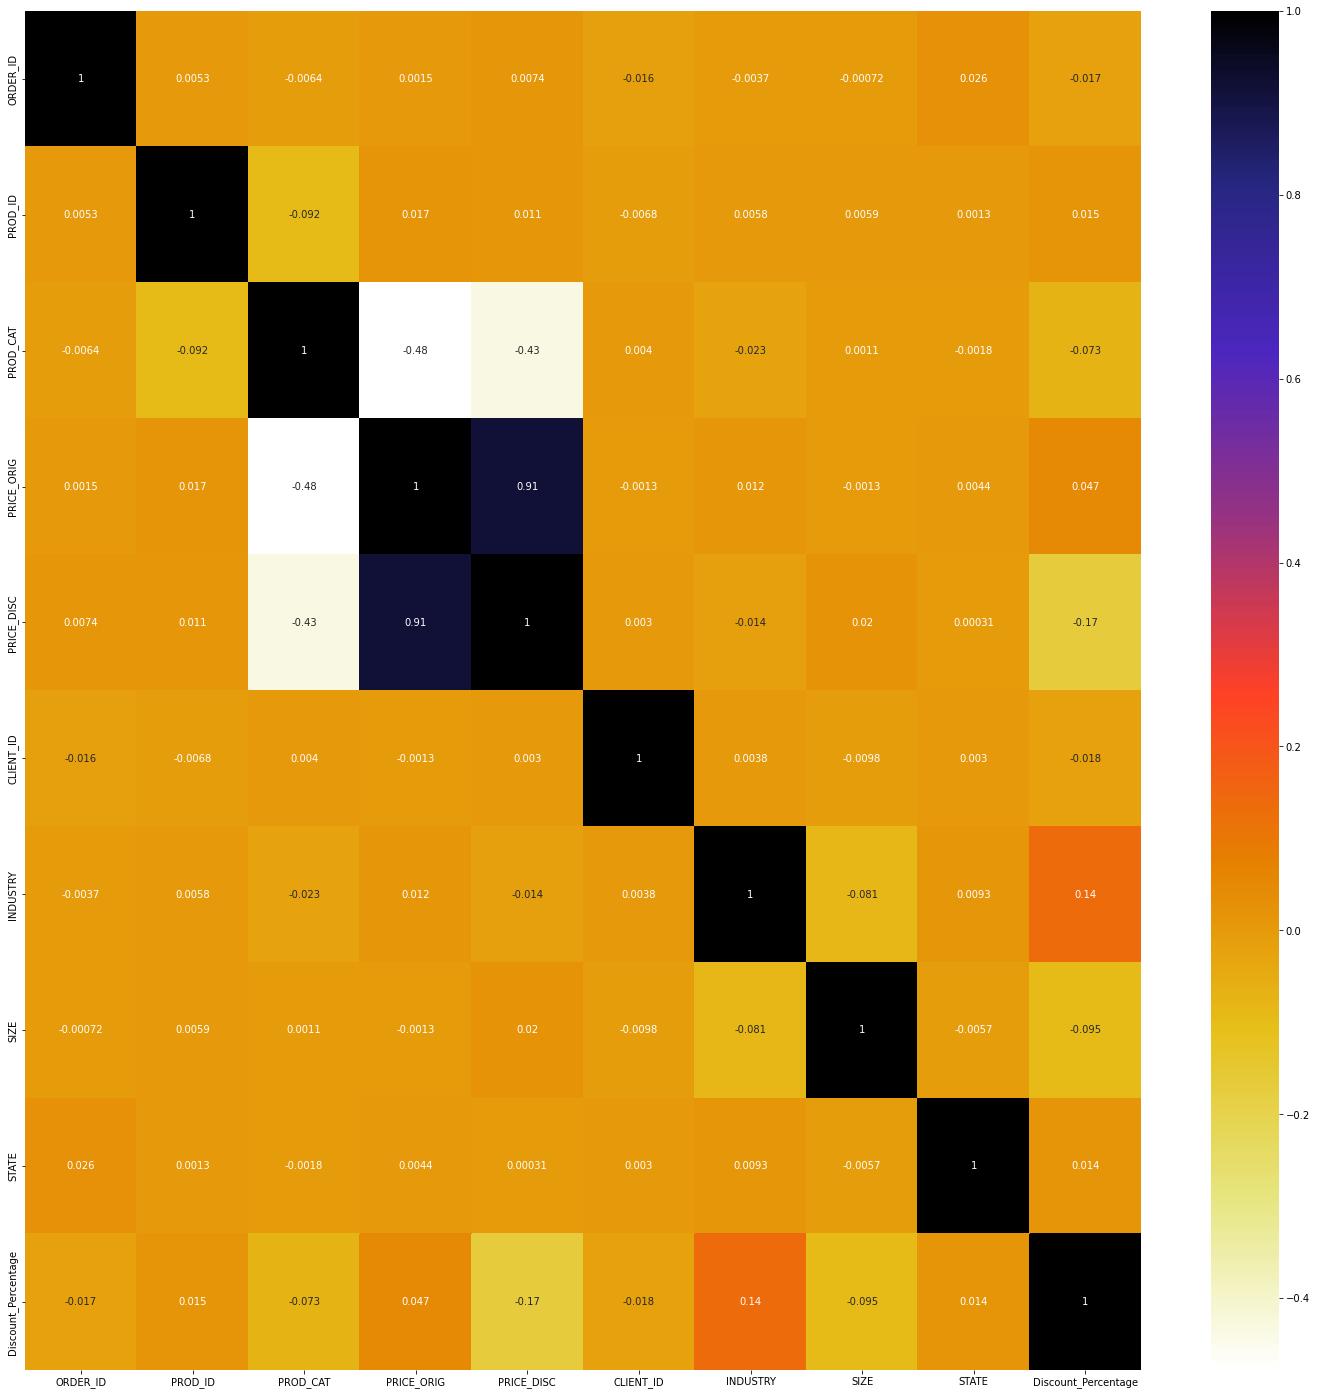

In [44]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = df.corr()  # plot the heatmap on X
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### After performing Statistical Analysis (P-val and R-Squared)  and Correlation Analysis INDUSTRY, SIZE and PRODUCT type
#### note - please check the file statistical analysis.ipynb for the statistical analysis

## Recommendation to increase Revenue by adjusting discount

### Finding the Total revenue


In [45]:
df = pd.read_csv('/content/IBM - IBM_CAO_data_challenge_DS_2021_.csv')

df['Discount_Percentage'] = ((df['PRICE_ORIG'] - df['PRICE_DISC'])/ df['PRICE_ORIG']) * 100


In [46]:
Total_after_discount = df['PRICE_DISC'].sum()
Total_after_discount

# 562 million approx

562670134.45

### Now finding revenue by INDUSTRY as it is the most important feature

In [47]:
IT_rev = df.loc[df['INDUSTRY'] == 'IT', 'PRICE_DISC'].sum()
IT_rev

## 222 Mill

220879407.55999997

In [48]:
Finance_rev = df.loc[df['INDUSTRY'] == 'FINANCE', 'PRICE_DISC'].sum()
Finance_rev

## 101 Mill


101263795.14999999

In [49]:
REAL_rev = df.loc[df['INDUSTRY'] == 'REAL ESTATE', 'PRICE_DISC'].sum()
REAL_rev

## 90 Mill

90744289.64000002

In [50]:
RETAIL = df.loc[df['INDUSTRY'] == 'RETAIL', 'PRICE_DISC'].sum()
RETAIL

## 78 Mill

78363488.43

In [51]:
HEALTH_CARE = df.loc[df['INDUSTRY'] == 'HEALTH CARE', 'PRICE_DISC'].sum()
HEALTH_CARE

## 71 Mill

71419153.67

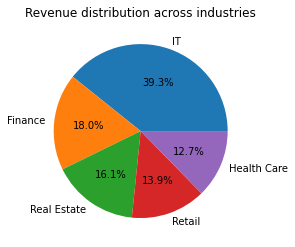

In [52]:

mylabels = ['IT', 'Finance', 'Real Estate','Retail','Health Care']
y = np.array([IT_rev,Finance_rev,REAL_rev,RETAIL,HEALTH_CARE])
plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.title("Revenue distribution across industries")
plt.show() 

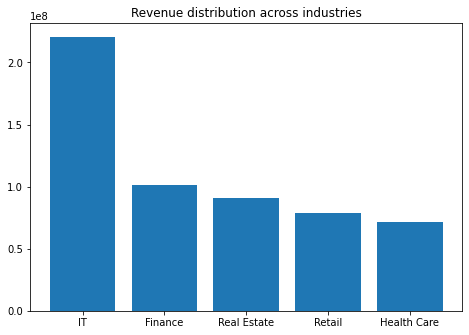

In [53]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['IT', 'Finance', 'Real Estate','Retail','Health Care']
y = np.array([IT_rev,Finance_rev,REAL_rev,RETAIL,HEALTH_CARE])
ax.bar(x,y)
plt.title("Revenue distribution across industries")
plt.show()

#### As INDUSTRY is the most important feature to determine the discount, IT industry has the highest percentage share of total revenue that is 39.3% i.e. around 222 million. Reducing the discount percentage here will increase the revenue by a good amount

#### Let's calculate the mean of discount percentage across all the industries

In [54]:
IT_discount_mean = df.loc[df['INDUSTRY'] == 'IT', 'Discount_Percentage'].mean()
IT_discount_mean

41.65087965750217

In [55]:
Finance_discount_mean = df.loc[df['INDUSTRY'] == 'FINANCE', 'Discount_Percentage'].mean()
Finance_discount_mean

16.602698948204008

In [56]:
REAL_ESTATE_discount_mean = df.loc[df['INDUSTRY'] == 'REAL ESTATE', 'Discount_Percentage'].mean()
REAL_ESTATE_discount_mean


28.099968857053877

In [57]:
RETAIL_discount_mean = df.loc[df['INDUSTRY'] == 'RETAIL', 'Discount_Percentage'].mean()
RETAIL_discount_mean


28.755550307038263

In [58]:
Health_discount_mean = df.loc[df['INDUSTRY'] == 'HEALTH CARE', 'Discount_Percentage'].mean()
Health_discount_mean

27.337936425221468

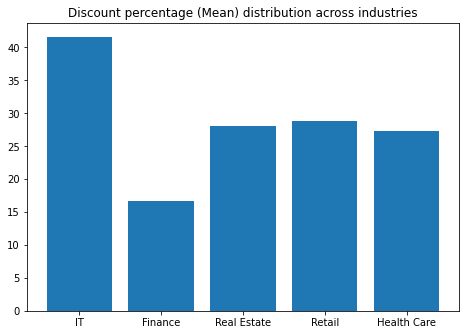

In [59]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['IT', 'Finance', 'Real Estate','Retail','Health Care']
y = np.array([IT_discount_mean,Finance_discount_mean,REAL_ESTATE_discount_mean,RETAIL_discount_mean,Health_discount_mean])
ax.bar(x,y)
plt.title("Discount percentage (Mean) distribution across industries")

plt.show()

In [60]:
IT_pric_mean = df.loc[df['INDUSTRY'] == 'IT', 'PRICE_ORIG'].mean()
IT_pric_mean
## average price before discount is 13124.59

13124.59716368988

In [61]:
IT_pric_dis_mean = df.loc[df['INDUSTRY'] == 'IT', 'PRICE_DISC'].mean()
IT_pric_dis_mean

## average price after discount 

7387.765320757164

In [62]:
## suppose if we consider average discount percentage to be 35 % instead of 41 %, 
#The average price after discount will be 8530 compared to earlier 7387


#### Hence, IT Industry has the highest discount percentage of 41.65. As IT has both highest revenue and discount, reducing discount in this will increase the revenue.

#### The next important feature is Size, let's do revenue analysis on this.

In [63]:
df['SIZE'].value_counts()

0-19       29064
20-99      18579
100-499    14183
500+        3927
Name: SIZE, dtype: int64

In [64]:
zero_19 = df.loc[df['SIZE'] == '0-19', 'PRICE_DISC'].sum()
zero_19
## 237 mill

237620348.69

In [65]:
twenty_99 = df.loc[df['SIZE'] == '20-99', 'PRICE_DISC'].sum()
twenty_99

## 161 mill

161554111.67

In [66]:
Hundred_499 = df.loc[df['SIZE'] == '100-499', 'PRICE_DISC'].sum()
Hundred_499

## 127 mill

127472132.73999998

In [67]:
Five_Plus = df.loc[df['SIZE'] == '500+', 'PRICE_DISC'].sum()
Five_Plus

## 36 mill

36023541.349999994

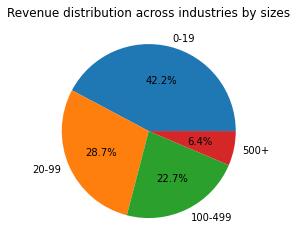

In [68]:
mylabels = ['0-19','20-99','100-499','500+']
y = np.array([zero_19,twenty_99,Hundred_499,Five_Plus])
plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.title("Revenue distribution across industries by sizes")
plt.show() 

#### MOST IMPORTANT CLIENTS

In [69]:
df_clients = df.groupby('CLIENT_ID')['PRICE_DISC'].sum()


In [70]:
sorted_series = df_clients.sort_values(ascending
                             = False)
sorted_series

CLIENT_ID
2380477    941974.34
4430288    901909.66
4549709    818749.71
7894067    745753.96
9035649    738542.54
             ...    
3752619        57.95
3726580        57.95
6000834        57.34
8657998        56.98
8471471        56.00
Name: PRICE_DISC, Length: 5793, dtype: float64

In [71]:
#final_df = df.sort_values(by=['Discount_Percentage'], ascending=False)
#df['Discount_Percentage'].value_counts()

In [72]:
#Disc_85 = df.loc[df['Discount_Percentage'] > 50, 'PRICE_DISC'].sum()
#Disc_85

In [73]:
#Disc_85 = df[(df['Discount_Percentage'] > 50) & (df['INDUSTRY'] == 'IT')]
#Disc_85['PRICE_DISC'].sum()


## Product wise analysis of revenue

In [74]:
df['PROD_CAT'].value_counts()

SAAS    22542
SW      21597
HW      19735
SS       1879
Name: PROD_CAT, dtype: int64

In [75]:
SAAS = df.loc[df['PROD_CAT'] == 'SAAS', 'PRICE_DISC'].sum()
SAAS
## 4 mill

4368669.97

In [76]:
SW = df.loc[df['PROD_CAT'] == 'SW', 'PRICE_DISC'].sum()
SW
## 82 mill

82537696.74000001

In [77]:
HW = df.loc[df['PROD_CAT'] == 'HW', 'PRICE_DISC'].sum()
HW
## 462 mill

466850007.28

In [78]:
SS = df.loc[df['PROD_CAT'] == 'SS', 'PRICE_DISC'].sum()
SS
# 8 mill

8913760.459999999

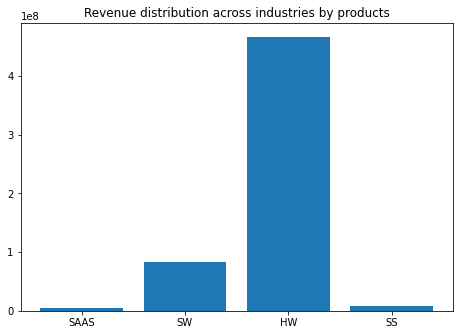

In [79]:



import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['SAAS','SW','HW','SS']
y = np.array([SAAS,SW,HW,SS])
ax.bar(x,y)
plt.title("Revenue distribution across industries by products")

plt.show()

#### Clearly, HW is the the product that generates the maximum revenue i.e nearly 80%. Decreasing the discount percentage for this product will increase in revenue.

#### Let's check for the revenue generated by IT Industries from size 0-19 and for the product HW only.

In [80]:
Club = df[(df['PROD_CAT'] == 'HW') & (df['INDUSTRY'] == 'IT') & (df['SIZE'] == '0-19')]
Club['PRICE_DISC'].sum()

## 99 million

99239858.35